# Automating confidentiality patterns in environmental accounts

In order to produce environmental accounts, data from various sources is integrated into a framework to derive estimates by industry. Some of the information used to construct these estimates are survey data that have been collected under the Statistics Act. The Act establishes the legal requirement for the agency to protect the confidentiality of respondents to Statistics Canada surveys and ensure respondents information will never be released to anyone in any form that will identify them. As such, data producers must take careful considerations before publishing data on the web.

As such, a systemical approach to suppressions should be developed for data aiming to be published. In this notebook, we'll use fictive data to decide whether a cell should be published or suppressed based through a simple decision tree algorithm.  


In [20]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


# load dataset
pattern = pd.read_csv('/Users/abdoul-razakmamane/Documents/Tree/Decision_tree.csv')

# Source column legend (1= Residual allocation; 2=Mix; 3=Survey Data)
pattern.head()


,IOIC,Description,Respondents,Source,Decision
0,1111,Oilseed and g1in farming,0,1,Publish
1,1112,Vegetable and melon farming,0,1,Publish
2,1113,Fruit and tree nut farming,0,1,Publish
3,1114,"Greenhouse, nursery and floriculture production",0,1,Publish
4,1119,Other crop farming,0,1,Publish


In [21]:
pattern["Source"] = pattern["Source"].astype('category')

pattern.head()
pattern.dtypes

IOIC              int64
Description      object
Respondents       int64
Source         category
Decision         object
dtype: object

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [23]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct? Expects, for a model that simple.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[Text(2232.0, 4530.0, 'Source <= 2.5\ngini = 0.32\nsamples = 80\nvalue = [16, 64]'),
 Text(1116.0, 2718.0, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(3348.0, 2718.0, 'Respondents <= 4.5\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(2232.0, 906.0, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(4464.0, 906.0, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

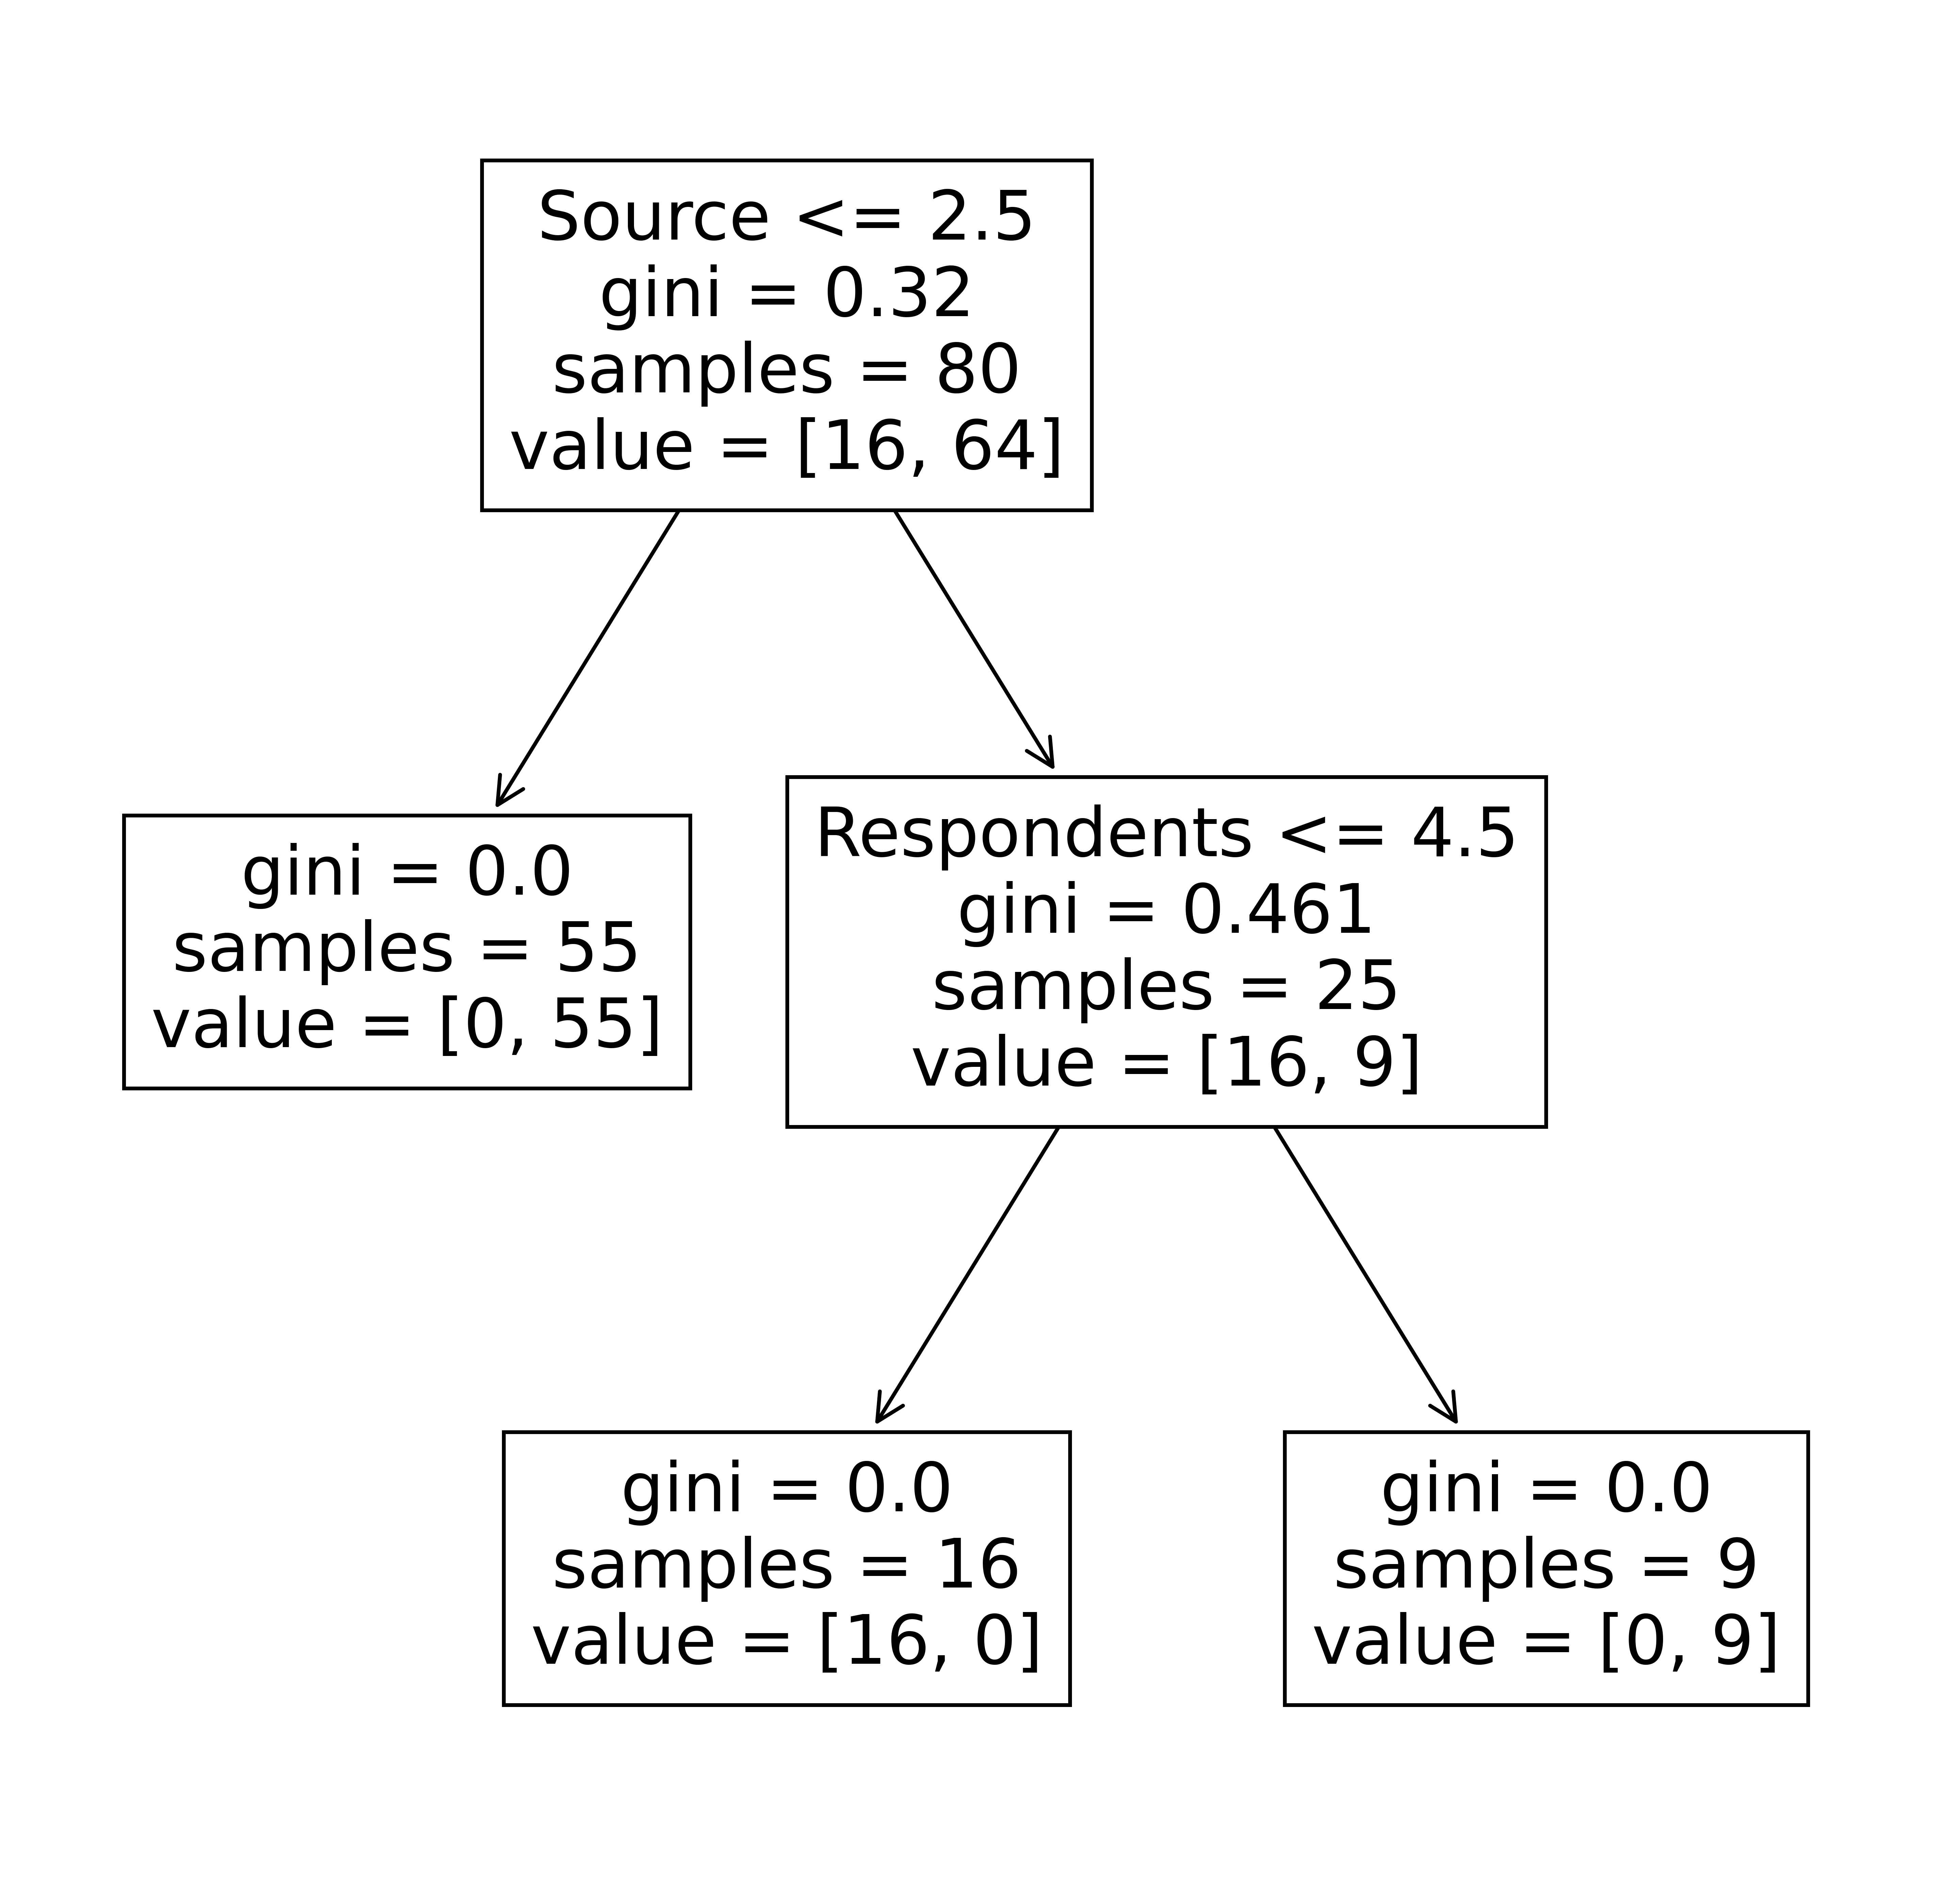

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=800)
tree.plot_tree(dtc, feature_names = ('Respondents', 'Source'))

# Results

The decision tree had two set of rules to work with:

1. What is the source of the data for a cell?
2. How many survey respondents are used to derive the estimate?

If the data from a cell was derived through residual allocation or a mix of data, it was deemed as publishable. Else, the data was sent to the second set of rules to evaluate the number of respondents included in the estimate. If the number of respondents is equal or above 5, than the cell was deemed as publishable. Further features could be developed with subject-matter, but for a data aggregation product the feature used in this example are sufficient.

It would be time consumming for an analyst to go through 20,000 + cells and apply the confidentiality pattern manually. As such, the lines of code below uses the algorithm developed in earlier steps and applies it to a new data before saving .csv file. 

In [38]:
x_new = pd.read_csv('/Users/abdoul-razakmamane/Documents/Tree/Decision_tree_test.csv') #Data for a new reference year
x_new = x_new[['Respondents','Source']]
new_confid_pattern = clf.predict(x_new)

x_new['Decision'] = new_confid_pattern
x_new.to_csv('/Users/abdoul-razakmamane/Documents/Tree/Confid_Pattern.csv')

print(x_new)

    Respondents  Source Decision
0             0       1  Publish
1             0       1  Publish
2             0       1  Publish
3             0       1  Publish
4             0       1  Publish
..          ...     ...      ...
88            6       3  Publish
89            8       3  Publish
90            3       3   Confid
91            8       3  Publish
92            4       3   Confid

[93 rows x 3 columns]
